# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
%matplotlib inline

# Load the rainfall dataset

In [2]:
df = pd.read_csv('rainfall.csv')
#shape of the dataset
print(df.shape)

(4116, 19)


4116 rows and 19 columns

In [3]:
#display 5 lines of the dataset
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
#Explore the columns and their datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4112 non-null float64
FEB            4113 non-null float64
MAR            4110 non-null float64
APR            4112 non-null float64
MAY            4113 non-null float64
JUN            4111 non-null float64
JUL            4109 non-null float64
AUG            4112 non-null float64
SEP            4110 non-null float64
OCT            4109 non-null float64
NOV            4105 non-null float64
DEC            4106 non-null float64
ANNUAL         4090 non-null float64
Jan-Feb        4110 non-null float64
Mar-May        4107 non-null float64
Jun-Sep        4106 non-null float64
Oct-Dec        4103 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.1+ KB


# Summary of the dataset

In [6]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [7]:
# check the columns

In [8]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

# How many records each sub-division has?

In [9]:
df['SUBDIVISION'].value_counts()

RAYALSEEMA                            115
JHARKHAND                             115
NORTH INTERIOR KARNATAKA              115
MATATHWADA                            115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
ORISSA                                115
JAMMU & KASHMIR                       115
PUNJAB                                115
CHHATTISGARH                          115
WEST UTTAR PRADESH                    115
ASSAM & MEGHALAYA                     115
SUB HIMALAYAN WEST BENGAL & SIKKIM    115
GUJARAT REGION                        115
UTTARAKHAND                           115
GANGETIC WEST BENGAL                  115
MADHYA MAHARASHTRA                    115
SOUTH INTERIOR KARNATAKA              115
COASTAL KARNATAKA                     115
WEST RAJASTHAN                        115
EAST UTTAR PRADESH                    115
KERALA                                115
TELANGANA                             115
WEST MADHYA PRADESH               

# Select SUBDIVISION 'Madhya Maharashtra'

In [10]:
df_up = df[df.SUBDIVISION == 'MADHYA MAHARASHTRA']
df_up

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2622,MADHYA MAHARASHTRA,1901,18.8,0.6,7.7,36.6,30.4,107.7,215.9,194.1,83.7,68.7,4.4,0.5,769.0,19.4,74.7,601.4,73.5
2623,MADHYA MAHARASHTRA,1902,7.8,0.0,0.1,5.0,9.8,102.6,210.9,114.5,169.5,60.4,40.5,62.9,784.0,7.8,14.9,597.5,163.8
2624,MADHYA MAHARASHTRA,1903,7.6,0.0,0.0,3.2,77.2,86.3,281.8,155.5,142.3,74.2,7.6,2.2,837.9,7.6,80.4,665.9,84.1
2625,MADHYA MAHARASHTRA,1904,0.4,4.7,1.7,3.0,18.7,114.6,126.5,59.5,183.0,91.1,0.0,0.4,603.5,5.1,23.4,483.6,91.4
2626,MADHYA MAHARASHTRA,1905,0.0,1.2,0.0,2.3,23.6,65.0,252.8,79.0,52.6,52.9,8.3,0.0,537.8,1.2,25.9,449.5,61.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,MADHYA MAHARASHTRA,2011,0.0,0.3,0.3,5.0,2.9,133.3,261.4,238.1,148.4,62.8,0.0,0.0,852.6,0.3,8.2,781.3,62.8
2733,MADHYA MAHARASHTRA,2012,0.0,0.0,0.0,3.0,1.4,67.9,203.0,187.8,129.5,95.2,2.2,0.0,689.8,0.0,4.4,588.1,97.3
2734,MADHYA MAHARASHTRA,2013,0.1,5.3,0.8,5.7,6.0,212.4,311.8,147.0,210.3,57.8,4.0,1.3,962.4,5.3,12.4,881.5,63.1
2735,MADHYA MAHARASHTRA,2014,3.1,6.2,24.4,7.5,29.8,44.0,277.9,240.3,120.4,38.5,32.8,13.1,838.0,9.3,61.7,682.6,84.4


# Plot the graph showing the trend of rainfall in Madhya Maharashtra

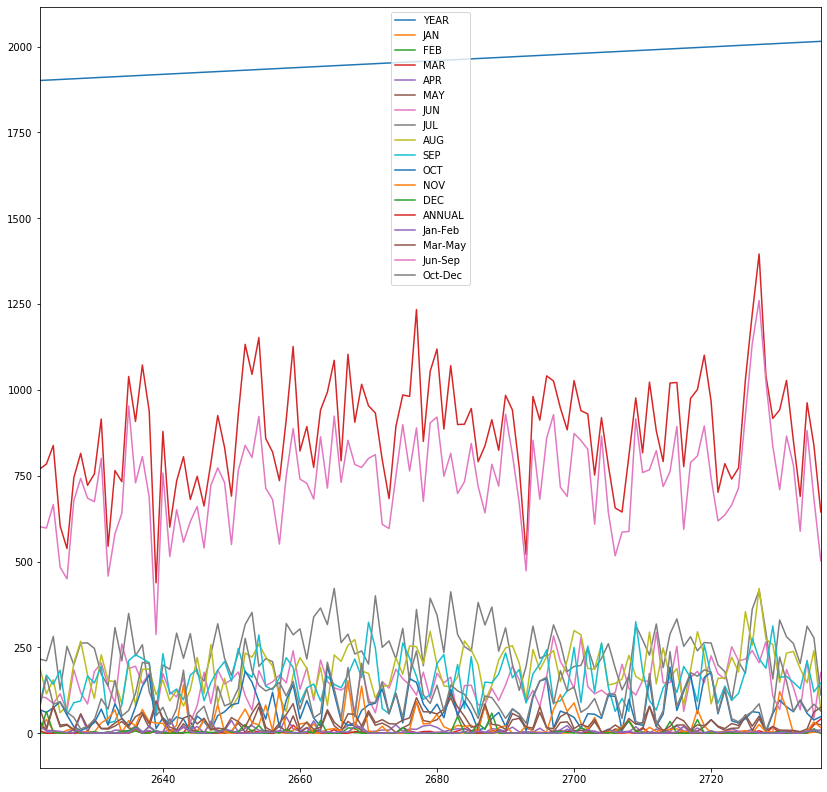

In [11]:
df_up.plot(figsize = (14,14), legend=True)

# Which are the 10 SUBDIVISION with less rainfall in the 2000?

In [12]:
df2000 = df.groupby('YEAR').get_group(2000)
less_rainfall10 = df2000[['SUBDIVISION','YEAR','ANNUAL']].sort_values('ANNUAL')
less_rainfall10.head(10)

,SUBDIVISION,YEAR,ANNUAL
1916,WEST RAJASTHAN,2000,235.3
2491,SAURASHTRA & KUTCH,2000,286.1
1456,HARYANA DELHI & CHANDIGARH,2000,384.4
1571,PUNJAB,2000,405.3
2031,EAST RAJASTHAN,2000,440.0
2376,GUJARAT REGION,2000,550.6
2836,MATATHWADA,2000,684.4
2721,MADHYA MAHARASHTRA,2000,701.6
3756,NORTH INTERIOR KARNATAKA,2000,712.4
1226,WEST UTTAR PRADESH,2000,771.4


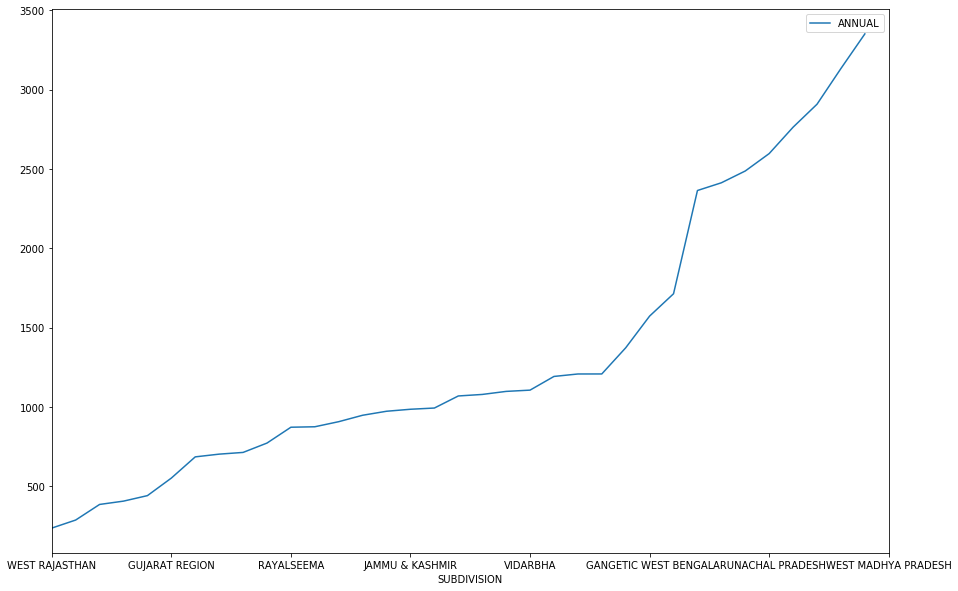

In [13]:
less_rainfall10.plot(x= 'SUBDIVISION', y='ANNUAL', figsize=(15,10))